In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
coordinates = zip(lats, lngs)

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

584

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | bako
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | dombarovskiy
Processing Record 5 of Set 1 | nichinan
Processing Record 6 of Set 1 | pevek
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | bowen
Processing Record 10 of Set 1 | nanortalik
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | vestmannaeyjar
Processing Record 13 of Set 1 | sambava
Processing Record 14 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | shingu
Processing Record 20 of Set 1 | rudnogorsk
Processing Record 21 of Set 1 | coruripe
Processing Record 22 of Set 1 | cape town
Processing Record 23 of Set 1 | diamantino


Processing Record 40 of Set 4 | bonthe
Processing Record 41 of Set 4 | cedar city
Processing Record 42 of Set 4 | el prat de llobregat
Processing Record 43 of Set 4 | qaanaaq
Processing Record 44 of Set 4 | la ronge
Processing Record 45 of Set 4 | ponta do sol
Processing Record 46 of Set 4 | vardo
Processing Record 47 of Set 4 | arraial do cabo
Processing Record 48 of Set 4 | mombetsu
Processing Record 49 of Set 4 | chuy
Processing Record 50 of Set 4 | kavaratti
Processing Record 1 of Set 5 | karwar
Processing Record 2 of Set 5 | faanui
Processing Record 3 of Set 5 | turukhansk
Processing Record 4 of Set 5 | carmen
Processing Record 5 of Set 5 | lebu
Processing Record 6 of Set 5 | arrifes
Processing Record 7 of Set 5 | hanstholm
Processing Record 8 of Set 5 | sorong
Processing Record 9 of Set 5 | boa vista
Processing Record 10 of Set 5 | pangnirtung
Processing Record 11 of Set 5 | tignere
Processing Record 12 of Set 5 | saravan
Processing Record 13 of Set 5 | san roque
Processing Recor

Processing Record 31 of Set 8 | lar
Processing Record 32 of Set 8 | mogocha
Processing Record 33 of Set 8 | ilhabela
Processing Record 34 of Set 8 | brownsville
Processing Record 35 of Set 8 | longlac
City not found. Skipping...
Processing Record 36 of Set 8 | sulangan
Processing Record 37 of Set 8 | peniche
Processing Record 38 of Set 8 | hwange
Processing Record 39 of Set 8 | alihe
Processing Record 40 of Set 8 | boddam
Processing Record 41 of Set 8 | mayo
Processing Record 42 of Set 8 | inhambane
Processing Record 43 of Set 8 | oussouye
Processing Record 44 of Set 8 | avera
Processing Record 45 of Set 8 | cabinda
Processing Record 46 of Set 8 | mocambique
City not found. Skipping...
Processing Record 47 of Set 8 | abu kamal
Processing Record 48 of Set 8 | zhanaozen
Processing Record 49 of Set 8 | vestbygda
City not found. Skipping...
Processing Record 50 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 1 of Set 9 | buin
Processing Record 2 of Set 9 | port

Processing Record 16 of Set 12 | alofi
Processing Record 17 of Set 12 | faya
Processing Record 18 of Set 12 | chodziez
Processing Record 19 of Set 12 | quang ngai
Processing Record 20 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 21 of Set 12 | kangaatsiaq
Processing Record 22 of Set 12 | hammerfest
Processing Record 23 of Set 12 | hadejia
Processing Record 24 of Set 12 | okhotsk
Processing Record 25 of Set 12 | damara
Processing Record 26 of Set 12 | tunduru
City not found. Skipping...
Processing Record 27 of Set 12 | dalbandin
Processing Record 28 of Set 12 | bargal
City not found. Skipping...
Processing Record 29 of Set 12 | brazzaville
Processing Record 30 of Set 12 | batagay-alyta
Processing Record 31 of Set 12 | khorinsk
Processing Record 32 of Set 12 | iroquois falls
Processing Record 33 of Set 12 | dasoguz
Processing Record 34 of Set 12 | bezerros
-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bako,5.7833,36.5667,70.23,56,70,4.27,ET,2021-04-01 18:20:16
1,Punta Arenas,-53.1500,-70.9167,51.80,76,0,9.22,CL,2021-04-01 18:19:00
2,Hermanus,-34.4187,19.2345,62.01,72,74,12.86,ZA,2021-04-01 18:20:16
3,Dombarovskiy,50.7587,59.5386,17.46,82,28,10.42,RU,2021-04-01 18:20:17
4,Nichinan,31.6000,131.3667,62.01,72,100,11.99,JP,2021-04-01 18:20:17
5,Pevek,69.7008,170.3133,-18.67,97,69,1.86,RU,2021-04-01 18:20:17
6,Kapaa,22.0752,-159.3190,75.20,73,75,13.80,US,2021-04-01 18:20:18
7,Thompson,55.7435,-97.8558,39.20,52,75,9.22,CA,2021-04-01 18:20:18
8,Bowen,-20.0167,148.2333,71.60,73,4,12.66,AU,2021-04-01 18:13:31
9,Nanortalik,60.1432,-45.2371,38.03,79,80,9.10,GL,2021-04-01 18:20:18


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bako,ET,2021-04-01 18:20:16,5.7833,36.5667,70.23,56,70,4.27
1,Punta Arenas,CL,2021-04-01 18:19:00,-53.1500,-70.9167,51.80,76,0,9.22
2,Hermanus,ZA,2021-04-01 18:20:16,-34.4187,19.2345,62.01,72,74,12.86
3,Dombarovskiy,RU,2021-04-01 18:20:17,50.7587,59.5386,17.46,82,28,10.42
4,Nichinan,JP,2021-04-01 18:20:17,31.6000,131.3667,62.01,72,100,11.99
5,Pevek,RU,2021-04-01 18:20:17,69.7008,170.3133,-18.67,97,69,1.86
6,Kapaa,US,2021-04-01 18:20:18,22.0752,-159.3190,75.20,73,75,13.80
7,Thompson,CA,2021-04-01 18:20:18,55.7435,-97.8558,39.20,52,75,9.22
8,Bowen,AU,2021-04-01 18:13:31,-20.0167,148.2333,71.60,73,4,12.66
9,Nanortalik,GL,2021-04-01 18:20:18,60.1432,-45.2371,38.03,79,80,9.10


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

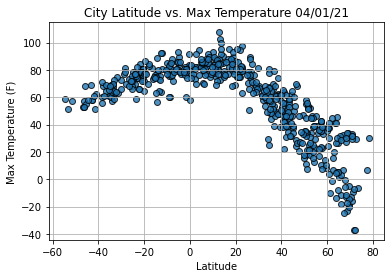

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

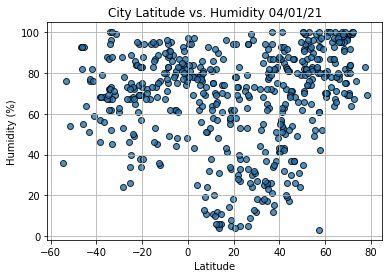

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

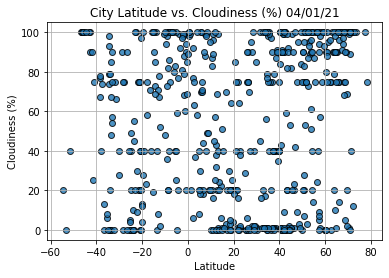

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

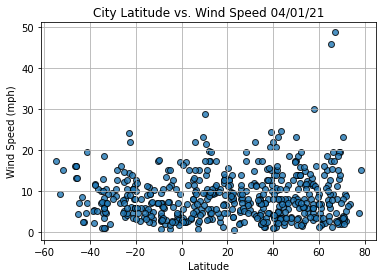

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

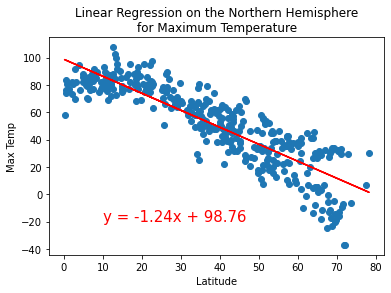

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,-20))

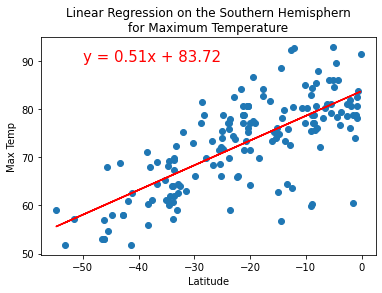

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphern\nfor Maximum Temperature', 'Max Temp',(-50,90))

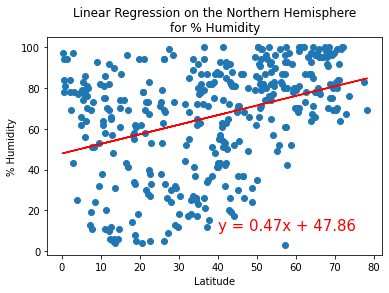

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', '% Humidity',(40,10))

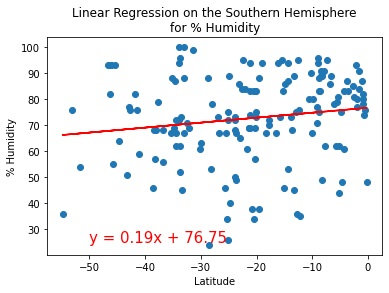

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-50,25))

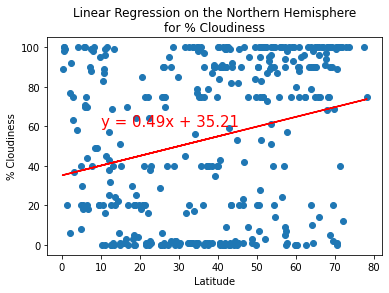

In [32]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', '% Cloudiness',(10,60))

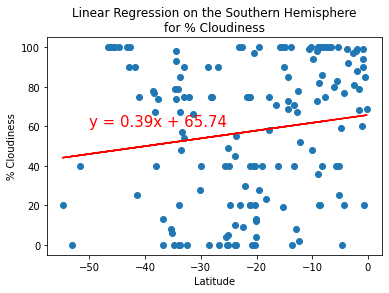

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', '% Cloudiness',(-50,60))

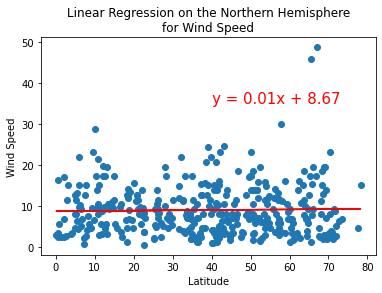

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(40,35))

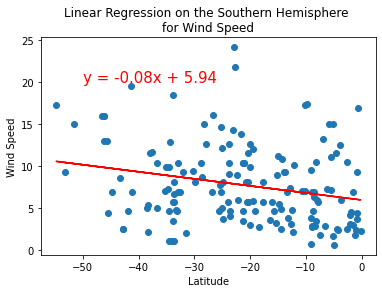

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,20))